In [ ]:
order <- read.csv("orders.csv", fileEncoding = "UTF-8-BOM")
product <- read.csv("products.csv", fileEncoding = "UTF-8-BOM")

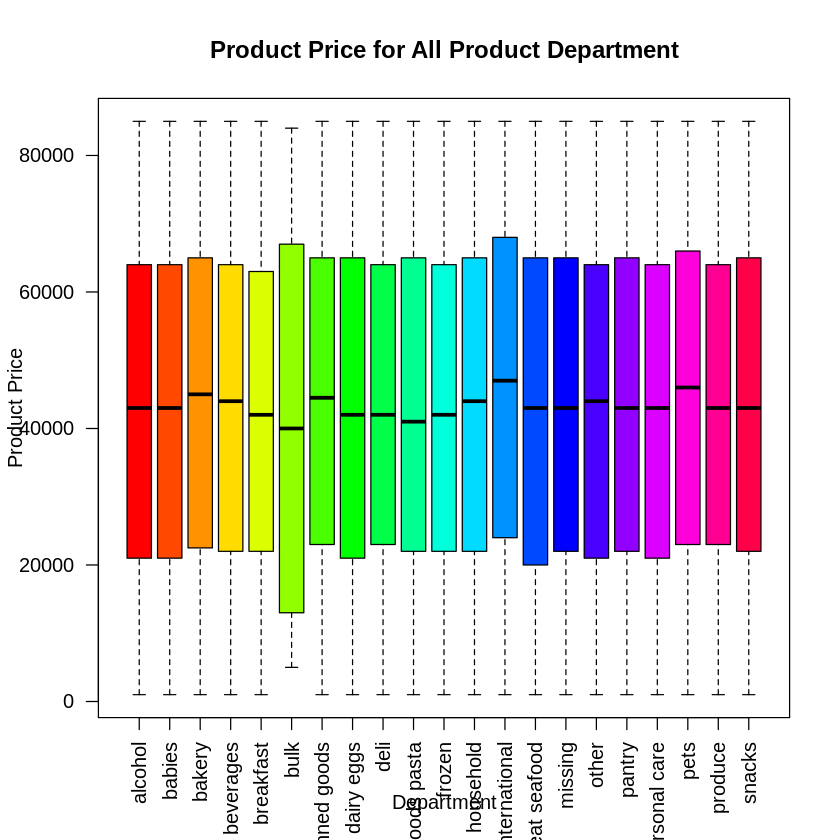

In [ ]:
boxplot(product$product_price ~ product$department, col = rainbow(length(unique(product$department))),
ylab = "Product Price", xlab = "Department", main = "Product Price for All Product Department", las = 2)

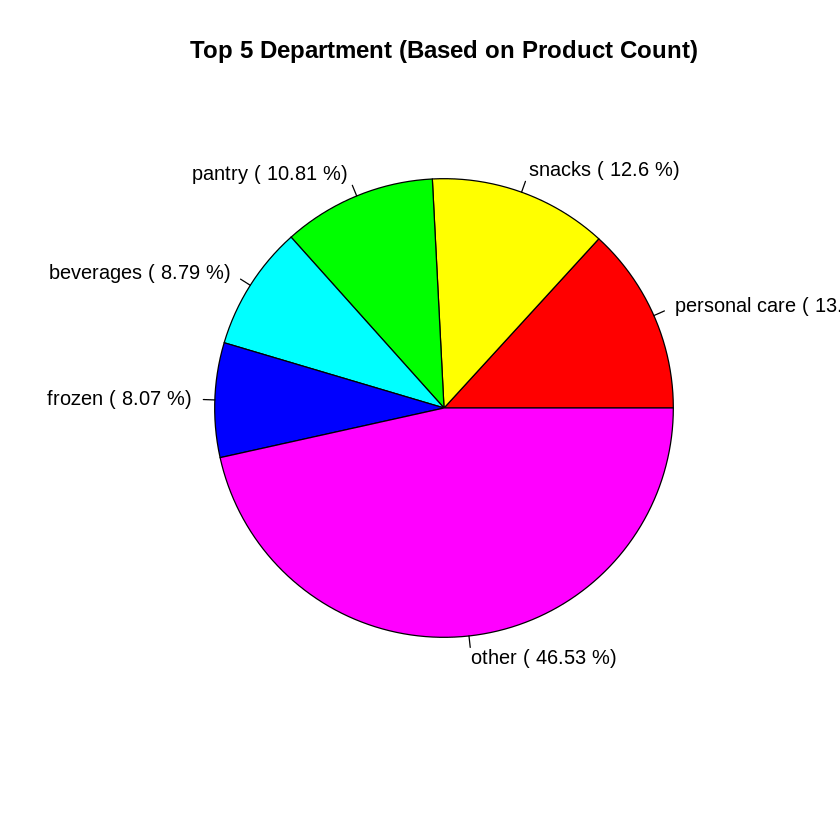

In [ ]:
pie.freq <- table(product$department)

pie.sort <- sort(pie.freq, decreasing = TRUE)
pie.top5 <- pie.sort[1:5]
pie.other <- sum(pie.sort[-(1:5)])

pie.final <- c(pie.top5, other = pie.other)

pie.percentage <- round(pie.final / sum(pie.final) * 100, 2)

pie.label <- paste(names(pie.final), "(", pie.percentage, "%)")

pie(pie.final, labels = pie.label, col = rainbow(6), main = "Top 5 Department (Based on Product Count)")

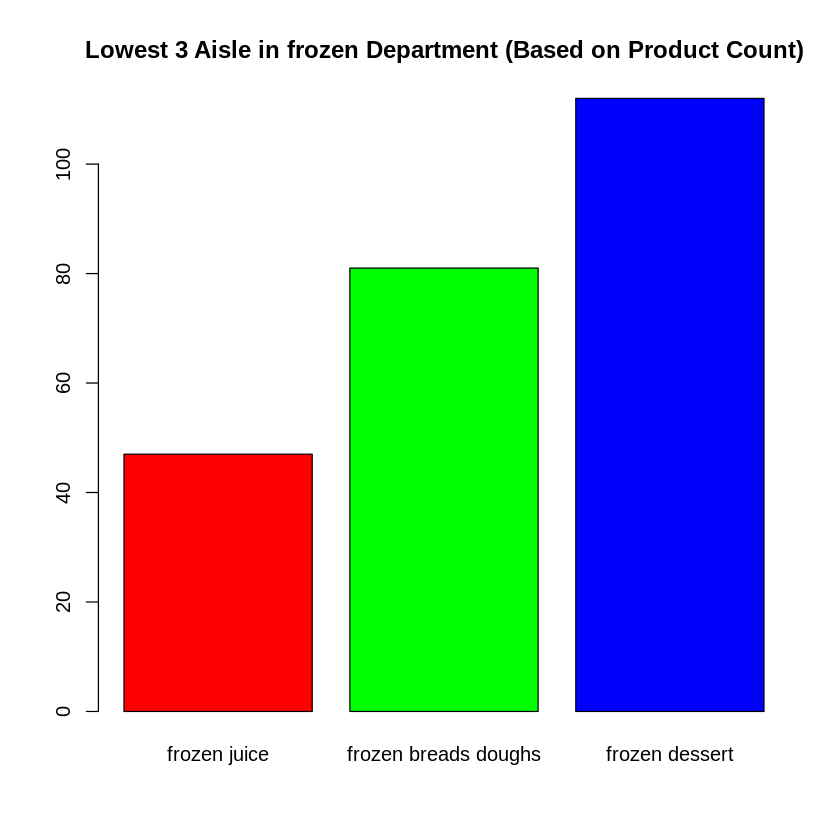

In [ ]:
bar.frozen <- subset(product, product$department == "frozen")

bar.freq <- table(bar.frozen$aisle)

bar.sort <- sort(bar.freq, decreasing = FALSE)
lowest3 <- bar.sort[1:3]

barplot(lowest3, col = rainbow(3), main = "Lowest 3 Aisle in frozen Department (Based on Product Count)")

In [ ]:
data <- merge(order, product, by.x = "product_id", by.y = "product_id")

sort1 <- subset(data, data$department == "alcohol")
sort2 <- subset(sort1, !sort1$aisle == "specialty wines champagnes")

final.sort <- sort2[!duplicated(sort2), ]

In [ ]:
install.packages("arules")
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [ ]:
data <- final.sort[!is.na(final.sort$aisle), ]
data <- final.sort[!is.nan(final.sort$product_id), ]
data <- final.sort[!is.nan(final.sort$order_id), ]
data <- final.sort[!is.na(final.sort$product_name), ]
data <- final.sort[!is.na(final.sort$department), ]
data <- final.sort[!is.nan(final.sort$product_price), ]


list_transaction <- split(final.sort$product_name, final.sort$order_id)
list_transaction <- as(list_transaction, "transactions")

In [ ]:
frequent.itemsets <- apriori(list_transaction, parameter = list(target = "frequent itemsets"), supp = 0.04)
inspect(frequent.itemsets)

association.rules <- apriori(list_transaction, parameter = list(target = "rules"), supp = 0.04, confidence = 0.5)

inspect(association.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.04      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[88 item(s), 90 transaction(s)] done [0.00s].
sorting and recoding items ... [9 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [11 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     items                 support    count
[1]  {India Pale Ale}      0.04444444  4   
[2]  {Chardonnay}          0.08888889  8   
[3]  {Cabernet Sauvignon}  0.05555556  5   
[4]  {Pinot Noir}          0.08888889  8   
[5]  {Pinot Grig